In [2]:
import pandas as pd

In [3]:
# pandas concat

india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [4]:
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [6]:
pd.concat([india_weather , us_weather],ignore_index=True)

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


In [7]:
df = pd.concat([india_weather , us_weather])

In [9]:
df.reset_index(drop=True)

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


In [10]:
pd.concat([india_weather , us_weather],axis=1)

,city,temperature,humidity,city,temperature,humidity
0,mumbai,32,80,new york,21,68
1,delhi,45,60,chicago,14,65
2,banglore,30,78,orlando,35,75


In [15]:
data = pd.concat([india_weather , us_weather],axis=0,keys=['india' , 'us'])

In [17]:
data

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [23]:
data.loc['india'].loc[0,['city']]

city    mumbai
Name: 0, dtype: object

In [27]:
# merge

df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df1

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35


In [25]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [28]:
pd.merge(df1 , df2 , how = 'inner')

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [33]:
df1 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "humidity": [21,14,35, 38],
})
df1

,city,humidity
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [34]:
df2 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})
df2

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


In [37]:
pd.merge(df1, df2 , how = 'inner' , on='city')

,city,humidity_x,humidity_y
0,new york,21,68
1,chicago,14,65


In [32]:
pd.merge(df1, df2 , how = 'outer')

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,baltimore,38.0,NaN
4,san diego,NaN,71.0


In [38]:
df1

,city,humidity
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [39]:
df2

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


In [41]:
pd.merge(df1, df2 , how = 'left', on='city')

,city,humidity_x,humidity_y
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,38,NaN


In [42]:
pd.merge(df1, df2 , how = 'right', on='city')

,city,humidity_x,humidity_y
0,chicago,14.0,65
1,new york,21.0,68
2,san diego,NaN,71


https://www.w3schools.com/sql/sql_join.asp

# handling missing data

In [ ]:
fillna , dropna

In [43]:
df = pd.read_csv('datasets/weather_data_nan.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [44]:
df.fillna(0)

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,0.0,9.0,Sunny
2,1/5/2017,28.0,0.0,Snow
3,1/6/2017,0.0,7.0,0
4,1/7/2017,32.0,0.0,Rain
5,1/8/2017,0.0,0.0,Sunny
6,1/9/2017,0.0,0.0,0
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [45]:
df.fillna({
    'temperature' : 100,
    'windspeed' : 50,
    'event' : 'no event'
})

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,100.0,9.0,Sunny
2,1/5/2017,28.0,50.0,Snow
3,1/6/2017,100.0,7.0,no event
4,1/7/2017,32.0,50.0,Rain
5,1/8/2017,100.0,50.0,Sunny
6,1/9/2017,100.0,50.0,no event
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [ ]:
df.fillna({
    'temperature' : df['windspeed'].mean,
    'windspeed' : 50,
    'event' : 'no event'
})

In [46]:
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [47]:
# dropna

df.dropna()

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [48]:
df.dropna(axis = 1)

,day
0,1/1/2017
1,1/4/2017
2,1/5/2017
3,1/6/2017
4,1/7/2017
5,1/8/2017
6,1/9/2017
7,1/10/2017
8,1/11/2017


In [49]:
df = pd.read_csv('datasets/weather_data_replace.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [50]:
import numpy as np

In [51]:
df.replace(-99999 , np.nan)

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/2/2017,NaN,7.0,Sunny
2,1/3/2017,28.0,NaN,Snow
3,1/4/2017,NaN,7.0,0
4,1/5/2017,32.0,NaN,Rain
5,1/6/2017,31.0,2.0,Sunny
6,1/6/2017,34.0,5.0,0


In [53]:
df.replace({
    'temperature' : -99999,
    'windspeed' : 7.0,
    'event' : '0'
},
{
    'temperature' : -100,
    'windspeed' : np.nan,
    'event' : 'no event'
})

,day,temperature,windspeed,event
0,1/1/2017,32,6.0,Rain
1,1/2/2017,-100,NaN,Sunny
2,1/3/2017,28,-99999.0,Snow
3,1/4/2017,-100,NaN,no event
4,1/5/2017,32,-99999.0,Rain
5,1/6/2017,31,2.0,Sunny
6,1/6/2017,34,5.0,no event


In [54]:
df

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,-99999,7,Sunny
2,1/3/2017,28,-99999,Snow
3,1/4/2017,-99999,7,0
4,1/5/2017,32,-99999,Rain
5,1/6/2017,31,2,Sunny
6,1/6/2017,34,5,0


In [55]:
# group by

In [56]:
data = pd.read_csv('datasets/weather_by_cities_group_by.csv')
data

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [ ]:
what is the max temp in each of the cities

In [58]:
df = data.groupby('city')

In [60]:
df.get_group('paris')

,day,city,temperature,windspeed,event
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy
10,1/3/2017,paris,54,8,Cloudy
11,1/4/2017,paris,42,10,Cloudy


In [62]:
df.max()['temperature']

city
mumbai      92
new york    36
paris       54
Name: temperature, dtype: int64

In [63]:
df.min()['temperature']

city
mumbai      85
new york    28
paris       42
Name: temperature, dtype: int64

In [64]:
df.mean()['temperature']

city
mumbai      88.50
new york    32.25
paris       47.75
Name: temperature, dtype: float64

In [ ]:
pd.read_csv()

# matplotlib

In [65]:
import matplotlib.pyplot as plt

In [66]:
week_day=[1,2,3,4,5,6,7]
temp=[50,51,52,48,47,49,46]

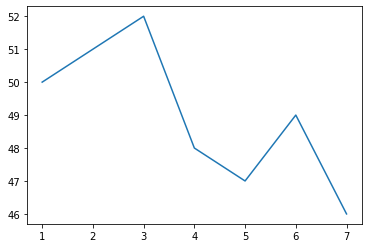

In [67]:
plt.plot(week_day, temp)

Text(0, 0.5, 'temp')

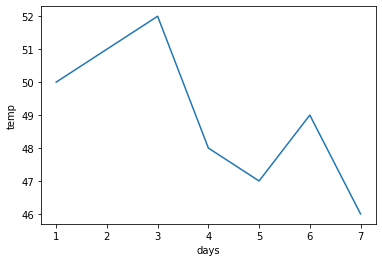

In [68]:
plt.plot(week_day, temp)
plt.xlabel('days')
plt.ylabel('temp')

Text(0.5, 1.0, 'days vs temp')

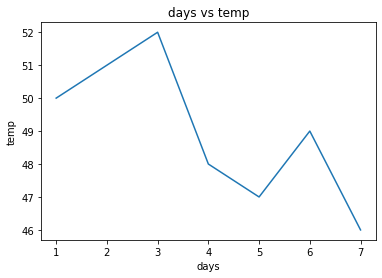

In [69]:
plt.plot(week_day, temp)
plt.xlabel('days')
plt.ylabel('temp')
plt.title('days vs temp')

Text(0, 0.5, 'temp')

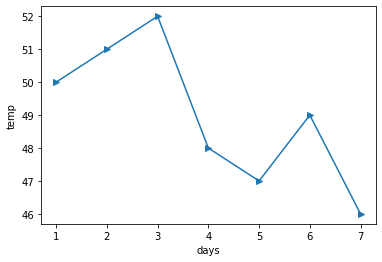

In [71]:
plt.plot(week_day, temp , marker='>')
plt.xlabel('days')
plt.ylabel('temp')

Text(0, 0.5, 'temp')

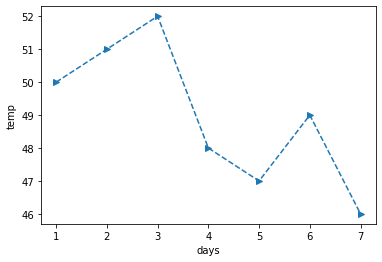

In [72]:
plt.plot(week_day, temp , marker='>' , linestyle = '--')
plt.xlabel('days')
plt.ylabel('temp')

Text(0, 0.5, 'temp')

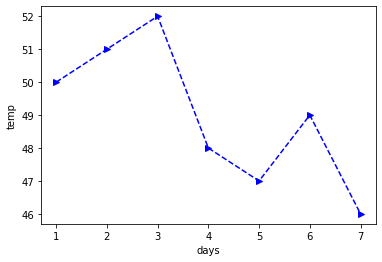

In [73]:
plt.plot(week_day, temp , marker='>' , linestyle = '--', color = 'b')
plt.xlabel('days')
plt.ylabel('temp')

In [75]:
days=[1,2,3,4,5,6,7] # weekdays
max_t=[50,51,52,48,47,49,46] # max temp recorder at that day
min_t=[43,42,40,44,33,35,37] # min temp
avg_t=[45,48,48,46,40,42,41] # avg temp

Text(0.5, 1.0, 'days vs temp')

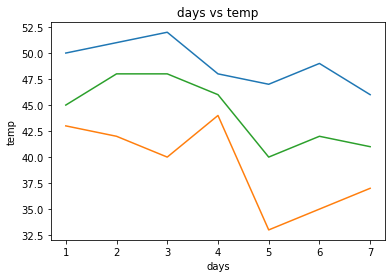

In [77]:
plt.plot(days , max_t)
plt.plot(days , min_t)
plt.plot(days , avg_t)
plt.xlabel('days')
plt.ylabel('temp')
plt.title('days vs temp')

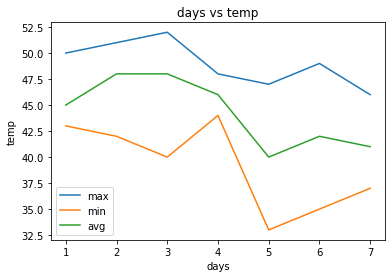

In [80]:
plt.plot(days , max_t , label = 'max')
plt.plot(days , min_t, label = 'min')
plt.plot(days , avg_t, label = 'avg')
plt.xlabel('days')
plt.ylabel('temp')
plt.title('days vs temp')
plt.legend()

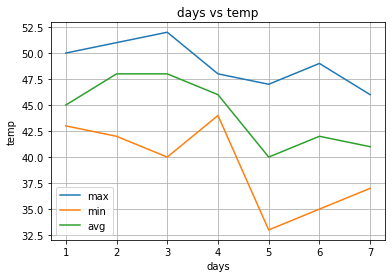

In [81]:
days=[1,2,3,4,5,6,7] # weekdays
max_t=[50,51,52,48,47,49,46] # max temp recorder at that day
min_t=[43,42,40,44,33,35,37] # min temp
avg_t=[45,48,48,46,40,42,41] # avg temp

plt.plot(days , max_t , label = 'max')
plt.plot(days , min_t, label = 'min')
plt.plot(days , avg_t, label = 'avg')
plt.xlabel('days')
plt.ylabel('temp')
plt.title('days vs temp')
plt.legend()
plt.grid()

# barplot

In [82]:
company=['GOOGL','AMZN','MSFT','FB']
revenue=[90,136,89,27]

<BarContainer object of 4 artists>

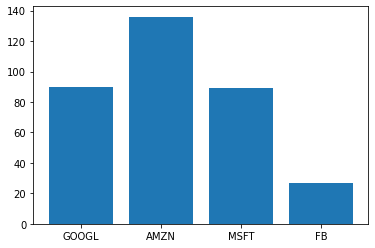

In [83]:
plt.bar(company , revenue)

<BarContainer object of 4 artists>

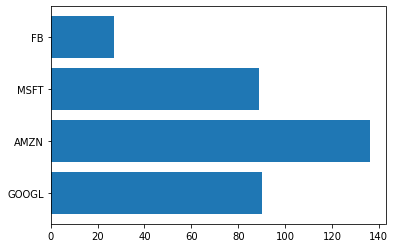

In [84]:
plt.barh(company , revenue)

# histogram

In [ ]:
x acis conatisn the varibale and y axis is the freq

In [85]:
blood_sugar = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]

'''80-100 - normal
100-125 - pre
125 + - dib'''

'80-100 - normal\n100-125 - pre\n125 + - dib'

(array([3., 3., 1., 0., 1., 1., 0., 2., 0., 2.]),
 array([ 77. ,  84.3,  91.6,  98.9, 106.2, 113.5, 120.8, 128.1, 135.4,
        142.7, 150. ]),
 <BarContainer object of 10 artists>)

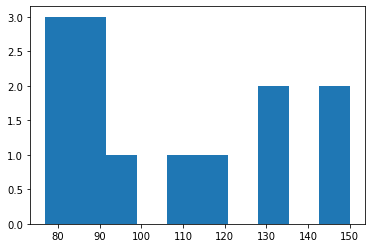

In [86]:
plt.hist(blood_sugar)

(array([7., 2., 4.]),
 array([ 70, 100, 125, 150]),
 <BarContainer object of 3 artists>)

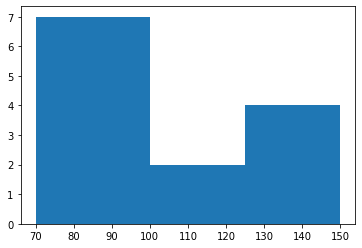

In [87]:
plt.hist(blood_sugar, bins=[70,100,125,150])

In [88]:
7+2+4

13

In [89]:
blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

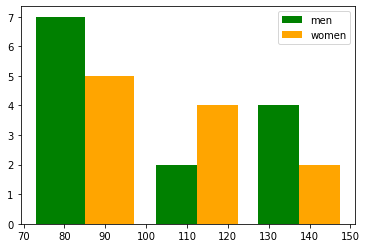

In [92]:
plt.hist([blood_sugar_men, blood_sugar_women] , bins=[70,100,125,150] , color=['green' , 'orange'] , label = ['men','women'])
plt.legend()